# Newsletter 5. Vector Calculus: Work (Line Integrals) and Green's Theorem

## Libraries and main settings

In [1]:
#Numerical computation
import numpy as np

#graph library
import matplotlib.pyplot as plt

#3d frame 
from mpl_toolkits.mplot3d import Axes3D

#To recognize LaTeX commands
plt.rc('text', usetex=True)

#font family
plt.rc('font', family='serif')

#style sheet
plt.style.use('dark_background')

#change the background color 
c_background = '#363636'

[_Style Sheets_](https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html)

## Work and Line integrals 

### Plot 1. Vector field + curve

**Parametric curve**
$$\vec{r}(t) = t \ \hat{i} + \left( 5\left( t-2 \right)^{2} +2\left( t-2 \right)^{3} \right)\hat{j} \\
0\leq t \leq 2.8$$

**Vector Field**
$$\vec{F}(x,y) = \sin(x) \ \hat{i} + \cos(y) \ \hat{j}$$

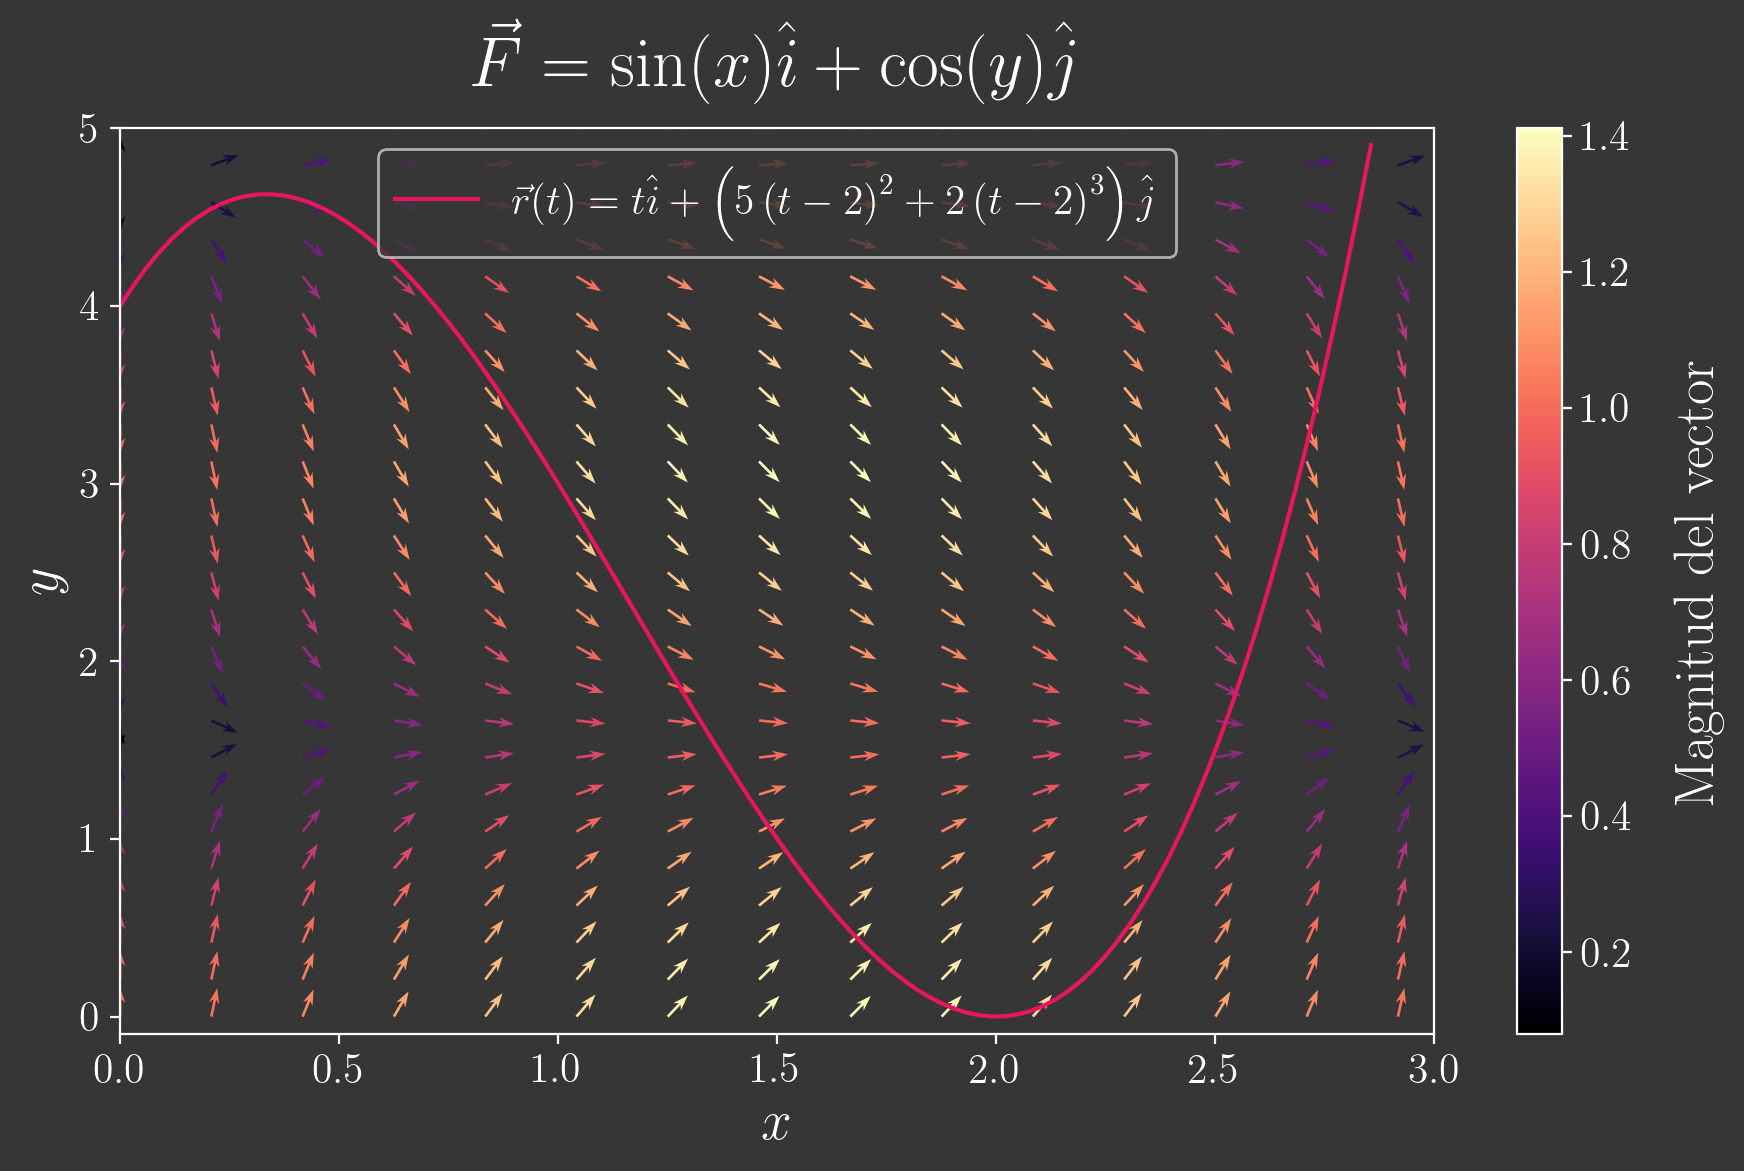

In [2]:
#non interactive plots
%matplotlib inline
#----------------------------- VECTOR FIELD ----------------------------------
#Domain of the vector field
X = np.linspace( 0, 5, 25 )
Y = np.linspace( 0, 5, 25 )


#Points in the XY plane
X,Y = np.meshgrid(X,Y)

#Value each component of the vector field => F(x,y) = u*i + v*j
U = np.sin(X)
V = np.cos(Y)

#magnitude of all the vectors
Magnitude = np.sqrt(U**2 + V**2)

#Normalize so all of them have magnitude of one
U = U/Magnitude
V = V/Magnitude

#------------------------------ PARAMETRIC CURVE --------------------------------------
#parameter t
t = np.linspace( 0, 2.855, 100 )

#parametric equation of the curve
X_curve = t
Y_curve = 5*( (t - 2)**2 ) + 2*( (t - 2)**3 )

#------------------------------ PLOT TIME ---------------------------------------------

#Create figure and dimensions
plt.figure(figsize=(10.6,6), 
           dpi = 200,
           facecolor = c_background #change the color of the background
          )
ax = plt.axes()
ax.set_facecolor( c_background ) #change the color of the background

#plot the line 
plt.plot( X_curve, Y_curve,
         label = r'$\vec{r}(t) = t \hat{i} + \left( 5\left( t-2 \right)^{2} + 2\left( t-2 \right)^{3}\right) \hat{j}$',
         color = '#E8175D'
        )

#Create the vector plot
plt.quiver( X, Y, #Position of each vector
           U, V, #value of each vector
           Magnitude, #magnitude of each vector, this will help the cmap
           width = 0.002,
           headwidth = 4, 
           headlength = 6,
           cmap = plt.cm.magma #assigns a color to each vector depending its magnitude
          )

#Add title and label to the axes
plt.title(r'$\vec{F} = \sin(x)\hat{i} + \cos(y) \hat{j}$', 
          size = 25, 
          pad = 15)
plt.xlabel( r'$x$', size = 20 )
plt.ylabel( r'$y$', size = 20 )

#limit the plot
plt.xlim( 0, 3 ) #show between 0 and 3
plt.ylim( -0.1, 5 ) #show between -0.1 and 5

#change size of the tick params
plt.tick_params( labelsize = 15 )

#create a legend for the line
legend = plt.legend( loc = 9, prop = {'size':15})
legend.get_frame().set_facecolor( c_background )

#create a color bar for the vector field.
#the color bar shows us the color assigned to the magnitude of the vector 
color_bar = plt.colorbar( orientation = 'vertical', 
                         pad = 0.05,
                        )

#Set a title to the colorbar
color_bar.set_label( label = 'Magnitud del vector', 
                    size = 20, 
                    labelpad = 15, #separation of the title from the color bar
                   )

#change the size of the numbers in the colorbar
color_bar.ax.tick_params( labelsize = 15 )

plt.show()


### Plot 2. Work (Line Integral in a Vector Field) from a geometric point of view

$$W = \int_C \vec{F}\cdot\text{d}\vec{r} = \int_{a}^{b} \vec{F}\left( \vec{r} (t) \right)\cdot \vec{r}' (t) \ \text{d}t$$

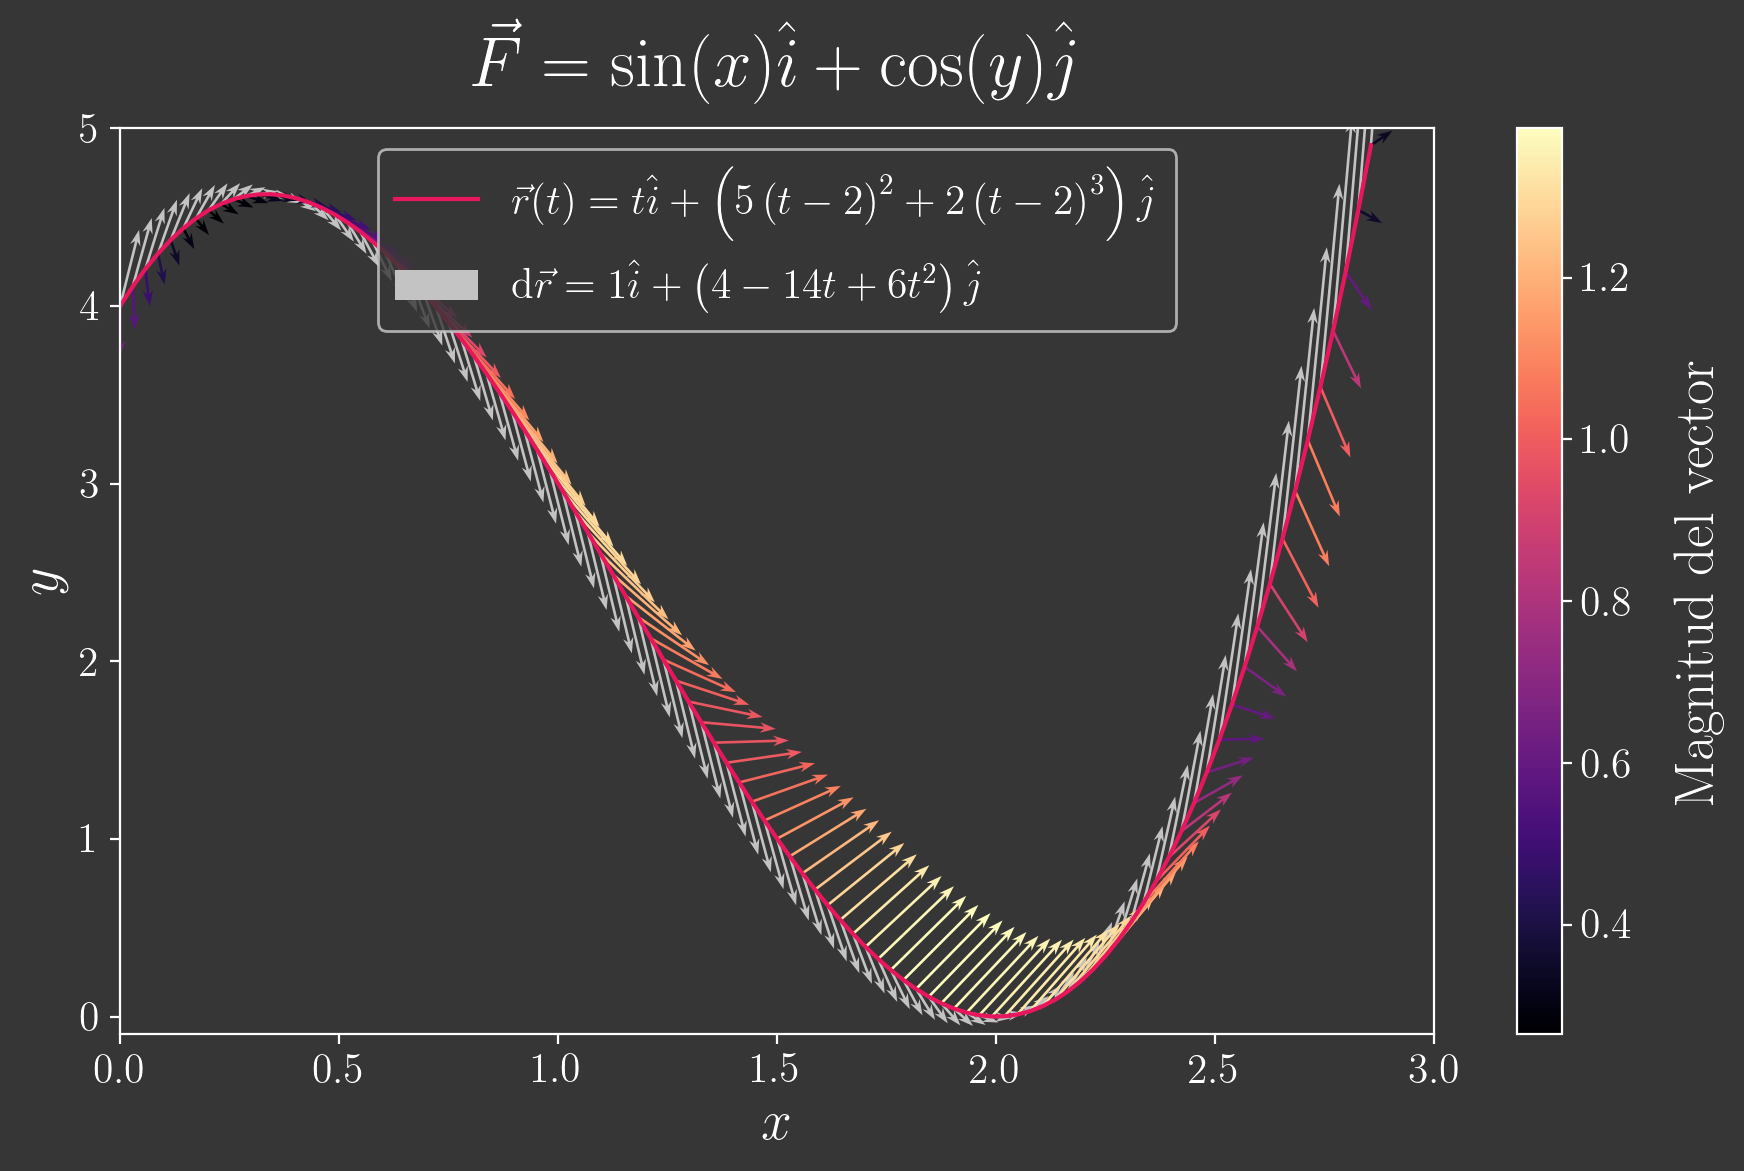

In [3]:
#non interactive plots
%matplotlib inline
#------------------------------ PARAMETRIC CURVE --------------------------------------
#parameter t
t = np.linspace( 0, 2.855, 100 )

#parametric equation of the curve
X_curve = t
Y_curve = 5*( (t - 2)**2 ) + 2*( (t - 2)**3 )

#------------------ r'(t) OF THE CURVE ---------------------------------------
U_dcurve = 1
V_dcurve = 4 - 14*t + 6*(t**2)


#----------------------------- VECTOR FIELD ----------------------------------
#Domain of the vector field
X = X_curve
Y = Y_curve

#Value each component of the vector field => F(x,y) = u*i + v*j
U = np.sin(X)
V = np.cos(Y)

#magnitude of all the vectors
Magnitude = np.sqrt(U**2 + V**2)

#Normalize so all of them have magnitude of one
U = U/Magnitude
V = V/Magnitude


#------------------------------ PLOT TIME ---------------------------------------------

#Create figure and dimensions
plt.figure(figsize=(10.6,6), 
           dpi = 200,
           facecolor = c_background #change the color of the background
          )
ax = plt.axes()
ax.set_facecolor( c_background ) #change the color of the background

#plot the line 
plt.plot( X_curve, Y_curve,
         label = r'$\vec{r}(t) = t \hat{i} + \left( 5\left( t-2 \right)^{2} + 2\left( t-2 \right)^{3}\right) \hat{j}$',
         color = '#E8175D'
        )


#Create the vector plot ( r'(t) )
plt.quiver( X_curve, Y_curve, #Position of each vector
           U_dcurve, V_dcurve, #value of each vector
           color = '#C3C3C3',
           width = 0.002,
           headwidth = 4, 
           headlength = 6,
           label = r'$\mathrm{d}\vec{r} = 1\hat{i} + \left( 4-14t + 6t^{2} \right)\hat{j}$'
          )

#Create the vector plot ( Vector field )
plt.quiver( X_curve, Y_curve, #Position of each vector
           U*Magnitude, V*Magnitude, #value of each vector
           Magnitude, #magnitude of each vector, this will help the cmap
           width = 0.002,
           headwidth = 4, 
           headlength = 6,
           cmap = plt.cm.magma #assigns a color to each vector depending its magnitude
          )


#Add title and label to the axes
plt.title(r'$\vec{F} = \sin(x)\hat{i} + \cos(y) \hat{j}$', 
          size = 25, 
          pad = 15)
plt.xlabel( r'$x$', size = 20 )
plt.ylabel( r'$y$', size = 20 )

#limit the plot
plt.xlim( 0, 3 ) #show between 0 and 3
plt.ylim( -0.1, 5 ) #show between -0.1 and 5

#change size of the tick params
plt.tick_params( labelsize = 15 )

#create a legend for the line
legend = plt.legend( loc = 9, prop = {'size':15})
legend.get_frame().set_facecolor( c_background )

#create a color bar for the vector field.
#the color bar shows us the color assigned to the magnitude of the vector 
color_bar = plt.colorbar( orientation = 'vertical', 
                         pad = 0.05,
                        )

#Set a title to the colorbar
color_bar.set_label( label = 'Magnitud del vector', 
                    size = 20, 
                    labelpad = 15, #separation of the title from the color bar
                   )
#change the size of the numbers in the colorbar
color_bar.ax.tick_params( labelsize = 15 )

plt.show()

## Green's Theorem

$$\oint_{C}\vec{F}\cdot\text{d}\vec{r} = \iint_{R} \left( \frac{\partial F_{y} }{\partial x} - \frac{\partial F_{x}}{\partial y} \right) \text{d}A$$

### Plot 3.  Vector Field + Closed Curve $r(t) =\left( 3\cos(t)\left( 1-\cos(t) \right) + 2 \right) \hat{i} + \left( 3\sin(t)\left( 1-\cos(t) \right) \right) \hat{j}$ 

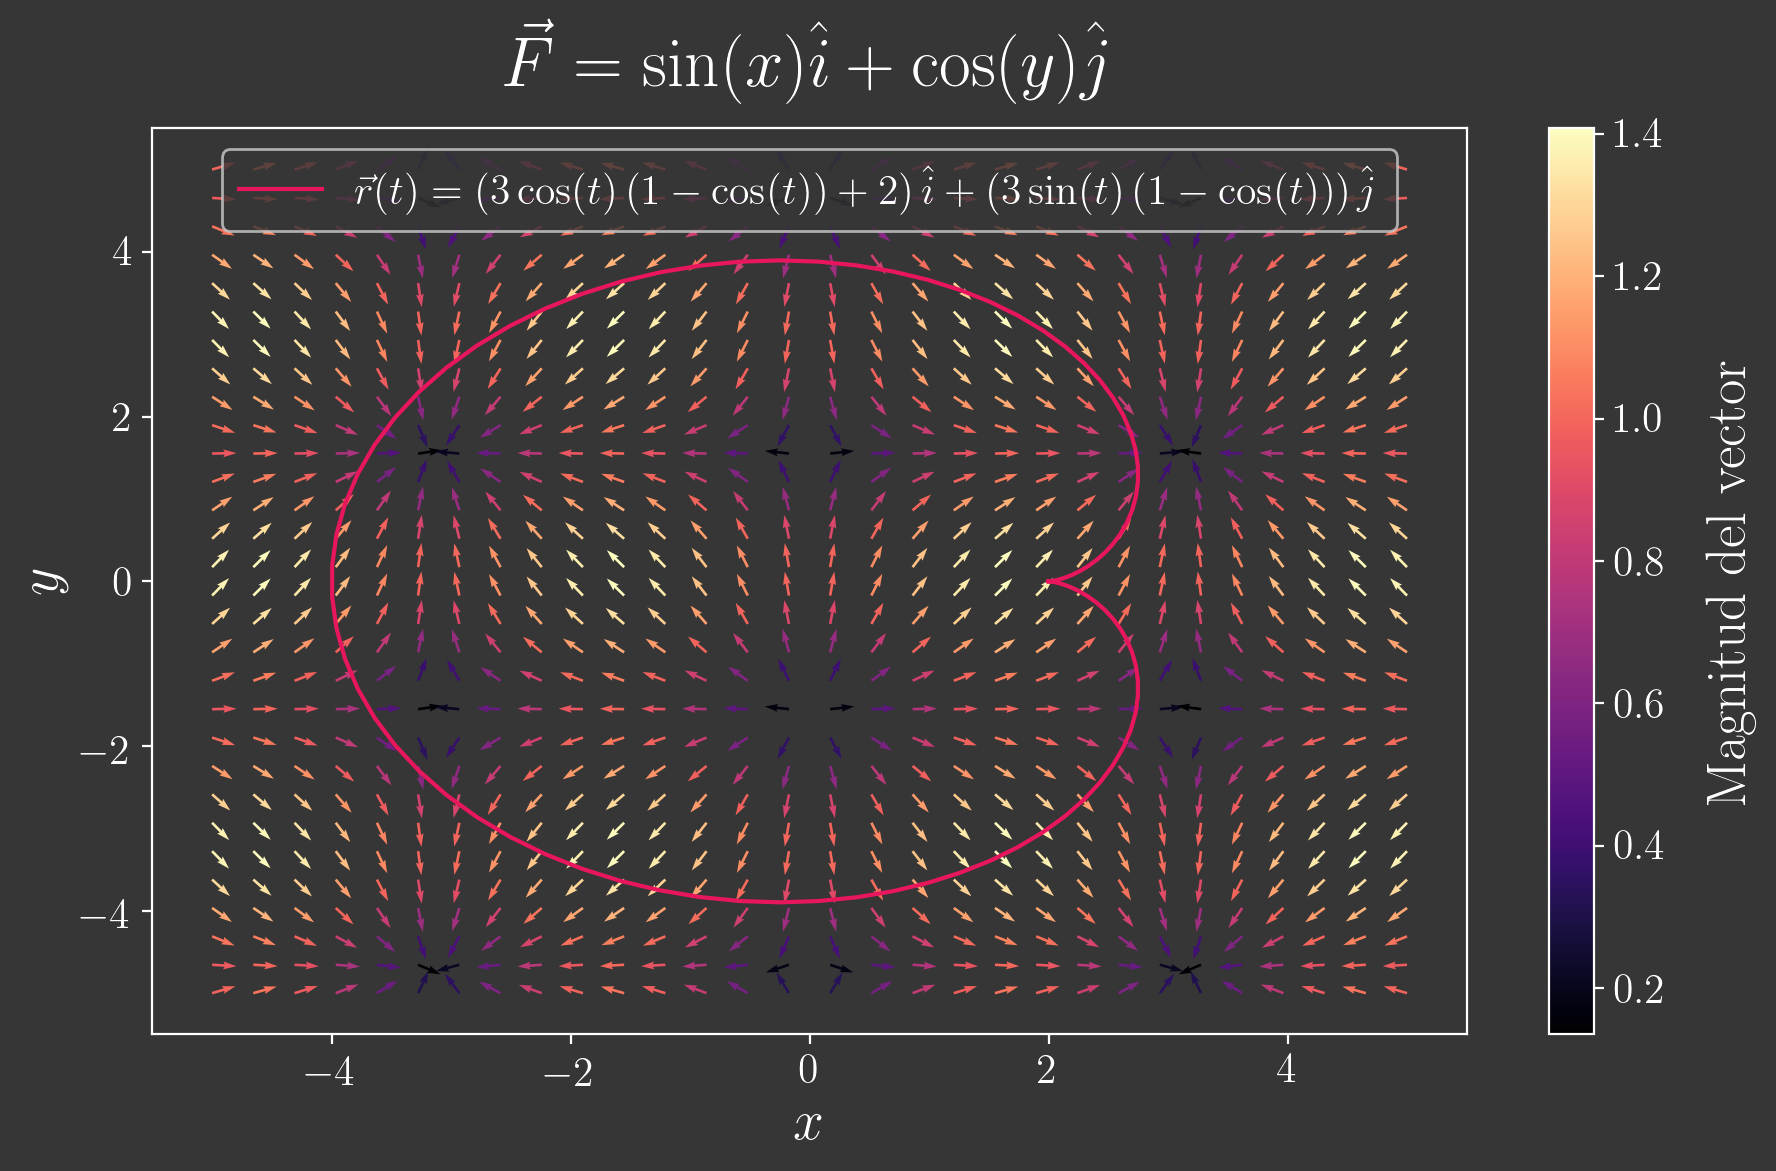

In [4]:
#non interactive plots
%matplotlib inline
#----------------------------- VECTOR FIELD ----------------------------------
#Domain of the vector field
X = np.linspace( -5, 5, 30 )
Y = np.linspace( -5, 5, 30 )


#Points in the XY plane
X,Y = np.meshgrid(X,Y)

#Value each component of the vector field => F(x,y) = u*i + v*j
U = np.sin(X)
V = np.cos(Y)

#magnitude of all the vectors
Magnitude = np.sqrt(U**2 + V**2)

#Normalize  so all of them have magnitude of one
U = U/Magnitude
V = V/Magnitude

#------------------------------ PARAMETRIC CURVE --------------------------------------
#parameter t
t = np.linspace( 0, 2*np.pi , 100 )

#parametric equation of the curve
X_curve = 3*np.cos( t )*( 1 - np.cos( t ) ) + 2
Y_curve = 3*np.sin( t )*( 1 - np.cos( t ) )

#------------------------------ PLOT TIME ---------------------------------------------

#Create figure and dimensions
plt.figure(figsize=(10.6,6), 
           dpi = 200,
           facecolor = c_background #change the color of the background
          )
ax = plt.axes()
ax.set_facecolor( c_background ) #change the color of the background

#plot the line 
plt.plot( X_curve, Y_curve,
         label = r'$\vec{r}(t) = \left( 3\cos(t)\left( 1-\cos(t) \right) + 2 \right) \hat{i} + \left( 3\sin(t)\left( 1-\cos(t) \right) \right) \hat{j}$',
         color = '#E8175D'
        )



#Create the vector plot
plt.quiver( X, Y, #Position of each vector
           U, V, #value of each vector
           Magnitude, #magnitude of each vector, this will help the cmap
           width = 0.002,
           headwidth = 3, 
           headlength = 5,
           cmap = plt.cm.magma #assigns a color to each vector depending its magnitude
          )

#Add title and label to the axes
plt.title(r'$\vec{F} = \sin(x)\hat{i} + \cos(y) \hat{j}$', 
          size = 25, 
          pad = 15)
plt.xlabel( r'$x$', size = 20 )
plt.ylabel( r'$y$', size = 20 )

#change size of the tick params
plt.tick_params( labelsize = 15 )

#create a legend for the line
legend = plt.legend( loc = 9, prop = {'size':15})
legend.get_frame().set_facecolor( c_background )

#create a color bar for the vector field.
#the color bar shows us the color assigned to the magnitude of the vector 
color_bar = plt.colorbar( orientation = 'vertical', 
                         pad = 0.05,
                        )

#Set a title to the colorbar
color_bar.set_label( label = 'Magnitud del vector', 
                    size = 20, 
                    labelpad = 15, #separation of the title from the color bar
                   )

#change the size of the numbers in the colorbar
color_bar.ax.tick_params( labelsize = 15 )

plt.show()

### Plot 4. Green's Theorem (Line Integral)

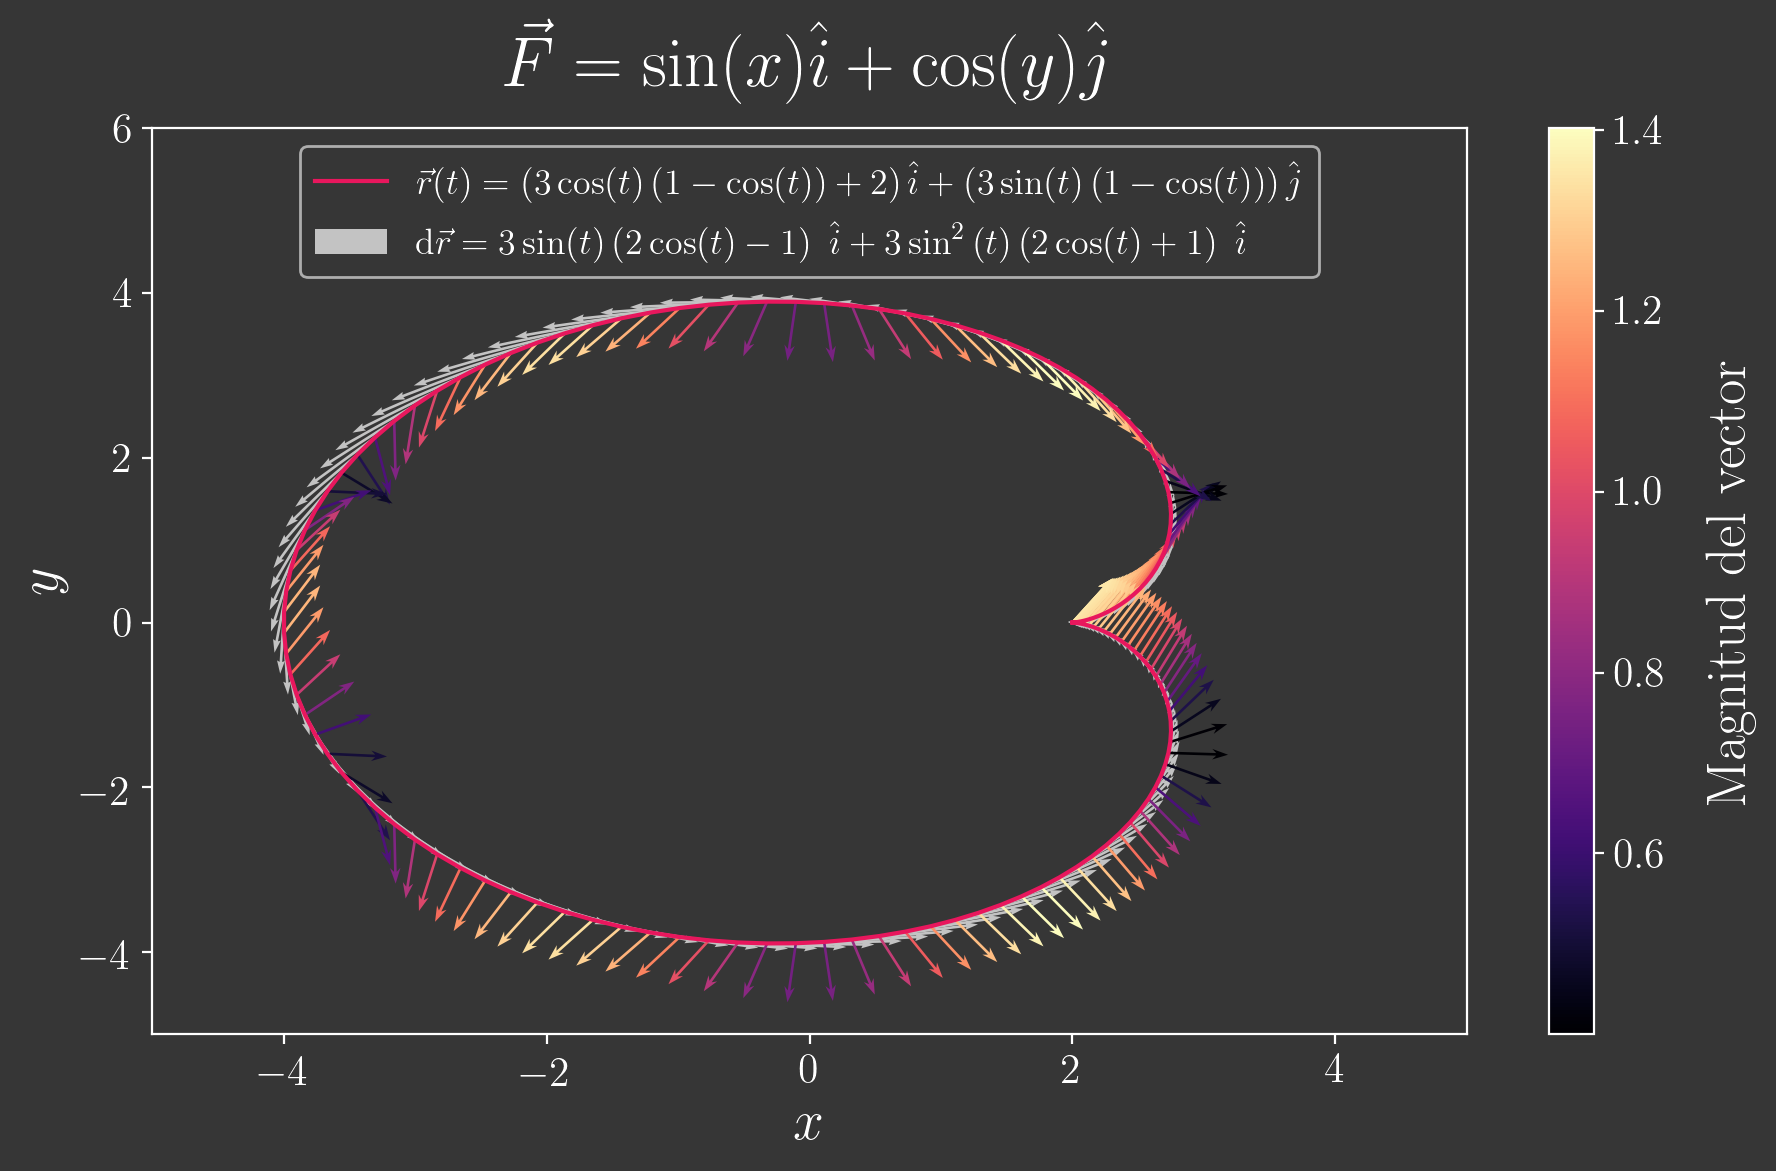

In [5]:
#non interactive plots
%matplotlib inline

#------------------------------------ PARAMETRIC CURVE --------------------------------------
#parameter t
t = np.linspace( 0, 2*np.pi , 150 )

#parametric equation of the curve
X_curve = 3*np.cos( t )*( 1 - np.cos( t ) ) + 2
Y_curve = 3*np.sin( t )*( 1 - np.cos( t ) )

#--------------------------------- r'(t) OF THE CURVE ---------------------------------------
U_dcurve = 3*( -1 + 2*np.cos(t) )*np.sin(t)
V_dcurve = 3*( 1 + 2*np.cos(t) )*( (np.sin(t/2))**2 )

#-------------------------------------------- VECTOR FIELD ----------------------------------
#Domain of the vector field
X = X_curve
Y = Y_curve

#Value each component of the vector field => F(x,y) = u*i + v*j
U = np.sin(X)
V = np.cos(Y)

#magnitude of all the vectors
Magnitude = np.sqrt(U**2 + V**2)

#Normalize so all of them have magnitude of one
U = U/Magnitude
V = V/Magnitude

#----------------------------------- PLOT TIME ---------------------------------------------

#Create figure and dimensions
plt.figure(figsize=(10.6,6), 
           dpi = 200,
           facecolor = c_background #change the color of the background
          )
ax = plt.axes()
ax.set_facecolor( c_background ) #change the color of the background

#plot the line 
plt.plot( X_curve, Y_curve,
         label = r'$\vec{r}(t) = \left( 3\cos(t)\left( 1-\cos(t) \right) + 2 \right) \hat{i} + \left( 3\sin(t)\left( 1-\cos(t) \right) \right) \hat{j}$',
         color = '#E8175D'
        )

#Create the vector plot ( r'(t) )
plt.quiver( X_curve, Y_curve, #Position of each vector
           U_dcurve, V_dcurve, #value of each vector
           color = '#C3C3C3',
           width = 0.002,
           headwidth = 3, 
           headlength = 5,
           label = r'$\mathrm{d}\vec{r} = 3\sin(t)\left( 2\cos(t) -1 \right) \ \hat{i} + 3\sin^{2}\left( t \right)\left( 2\cos(t) +1 \right) \ \hat{i} $'
          )

#Create the vector plot
plt.quiver( X, Y, #Position of each vector
           U, V, #value of each vector
           Magnitude, #magnitude of each vector, this will help the cmap
           width = 0.002,
           headwidth = 4, 
           headlength = 6,
           cmap = plt.cm.magma #assigns a color to each vector depending its magnitude
          )

#Add title and label to the axes
plt.title(r'$\vec{F} = \sin(x)\hat{i} + \cos(y) \hat{j}$', 
          size = 25, 
          pad = 15)
plt.xlabel( r'$x$', size = 20 )
plt.ylabel( r'$y$', size = 20 )

#limit the plot
plt.xlim( -5, 5 )
plt.ylim( -5, 6 )

#change size of the tick params
plt.tick_params( labelsize = 15 )

#create a legend for the line
legend = plt.legend( loc = 9, prop = {'size':13})
legend.get_frame().set_facecolor( c_background )

#create a color bar for the vector field.
#the color bar shows us the color assigned to the magnitude of the vector 
color_bar = plt.colorbar( orientation = 'vertical', 
                         pad = 0.05,
                        )

#Set a title to the colorbar
color_bar.set_label( label = 'Magnitud del vector', 
                    size = 20, 
                    labelpad = 15, #separation of the title from the color bar
                   )

#change the size of the numbers in the colorbar
color_bar.ax.tick_params( labelsize = 15 )

plt.show()